# PYTHON SPRINT1 PROJECT -    DIWALI_SALES_ANALYSIS

In [110]:
#Import necessary libraries using alias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
#Read the CSV file into a DataFrame
df = pd.read_csv("EV_Population.csv", encoding= 'unicode_escape')

In [112]:
# Display the first 10 rows of the DataFrame. This provides a preview of the data to check if it was loaded correctly.

df.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Owner Age,status,Example
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,28,NaN,NaN
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,35,NaN,NaN
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10,35,NaN,NaN
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,16,NaN,NaN
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10,28,NaN,NaN


In [113]:
#To know the total number of rows and columns in dataset we use .shape

df.shape

(149699, 20)

## **Inference :** 

**Dataset comprises 150482 rows and 20 columns.**

In [114]:
# Display basic information like the columns name and their corresponding data types along with finding if they contain null values or not. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149699 entries, 0 to 149698
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN                                                149699 non-null  object 
 1   County                                             149696 non-null  object 
 2   City                                               149696 non-null  object 
 3   State                                              149699 non-null  object 
 4   Postal Code                                        149696 non-null  float64
 5   Model Year                                         149699 non-null  int64  
 6   Make                                               149699 non-null  object 
 7   Model                                              149699 non-null  object 
 8   Electric Vehicle Type                              149699 non-null  object

## **Inference :**

**Status and unnamed1 columns are blank and Amount column has some null values.**

In [115]:
# Drop specified columns from the DataFrame
# 'axis=1' specifies that columns should be dropped, and 'inplace=True' makes the change permanent in the original DataFrame

df.drop(['status','Example'],axis=1,inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149699 entries, 0 to 149698
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN                                                149699 non-null  object 
 1   County                                             149696 non-null  object 
 2   City                                               149696 non-null  object 
 3   State                                              149699 non-null  object 
 4   Postal Code                                        149696 non-null  float64
 5   Model Year                                         149699 non-null  int64  
 6   Make                                               149699 non-null  object 
 7   Model                                              149699 non-null  object 
 8   Electric Vehicle Type                              149699 non-null  object

## **Inference :**

**Status and unnamed1 columns dropped out**



In [117]:
# Display the last few rows of the DataFrame using the tail() method. This provides a quick preview of the end of the DataFrame

df.tail()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Owner Age
149694,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10,44
149695,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,24
149696,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,41
149697,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10,26
149698,7SAYGDEF8N,Skagit,Mount Vernon,WA,98273.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,207667589,POINT (-122.338975 48.41333),PUGET SOUND ENERGY INC,5.305795e+10,52


In [118]:
#Use isnull() to identify missing values in the DataFrame   
# use .sum() to sum the True values along each column

pd.isnull(df).sum()

VIN                                                    0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
Owner Age                      

## **Inference :**

  **7 columns has null values**

In [119]:
# Use dropna() to remove rows with any missing values
# 'inplace=True' makes the changes permanent in the original DataFrame

df.dropna(inplace=True)

In [120]:
# again checking if there is any null value or not

pd.isnull(df).sum()

VIN                                                  0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Owner Age                                            0
dtype: int

## **Inference :**

  **Now, there is no null value in any column. so, the dataset is clean now.**

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149354 entries, 0 to 149698
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN                                                149354 non-null  object 
 1   County                                             149354 non-null  object 
 2   City                                               149354 non-null  object 
 3   State                                              149354 non-null  object 
 4   Postal Code                                        149354 non-null  float64
 5   Model Year                                         149354 non-null  int64  
 6   Make                                               149354 non-null  object 
 7   Model                                              149354 non-null  object 
 8   Electric Vehicle Type                              149354 non-null  object 
 9 

In [122]:
# Use describe() to generate summary statistics, including count, mean, std (standard deviation), min, 25%, 50%, 75%, and max

df[['Model Year','Electric Range','Owner Age']].describe()

,Model Year,Electric Range,Owner Age
count,149354.000000,149354.000000,149354.000000
mean,2019.990204,68.086546,35.429101
std,3.010106,96.374627,12.753123
min,1997.000000,0.000000,12.000000
25%,2018.000000,0.000000,27.000000
50%,2021.000000,18.000000,33.000000
75%,2022.000000,97.000000,43.000000
max,2023.000000,337.000000,92.000000


## **Inference :**

**There are 150137 observations in the dataset.The average range is approximately 67 Km.The range values have a standard deviation of approximately 96.22, indicating some variability in range.The minimum range in the dataset is 0 Km.25% of the individuals are aged 27 years or younger.**


In [123]:
#Pivot table to show total EV by Making Company category and City

pd.pivot_table(df, values='Electric Range', index='Make', columns='City', aggfunc='sum', fill_value=0)

City,Aberdeen,Acme,Addy,Airway Heights,Alderdale,Algona,Allyn,Amanda Park,Amboy,Anacortes,...,Winthrop,Wishram,Woodinville,Woodland,Woodway,Yacolt,Yakima,Yarrow Point,Yelm,Zillah
Make,,,,,,,,,,,,,,,,,,,,,
AUDI,222,0,0,0,0,204,18,0,0,535,...,0,0,3123,16,431,16,362,644,0,0
AZURE DYNAMICS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BENTLEY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,21,0,0,0
BMW,102,0,0,0,0,13,34,0,97,1393,...,0,0,3224,169,213,130,609,422,249,57
CADILLAC,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,0,0,40,0,0,0
CHEVROLET,1315,238,0,326,0,35,450,0,238,7497,...,582,0,11512,1355,0,276,4978,550,2104,0
CHRYSLER,96,0,0,0,0,0,0,0,0,194,...,65,0,875,97,32,0,130,33,194,0
FIAT,261,0,0,0,0,87,84,0,0,348,...,0,0,258,0,0,0,174,0,261,0
FISKER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#Total EV's and Zone

pd.pivot_table(df, values='Electric Vehicle Type', index=["County","City"],  aggfunc='count',fill_value=0)

Electric Vehicle Type
County City                             
Adams  Hatton                          1
       Lind                            2
       Othello                        20
       Ritzville                      17
       Washtucna                       1
...                                  ...
Yakima Union Gap                       5
       Wapato                         10
       White Swan                      2
       Yakima                        548
       Zillah                         25

[500 rows x 1 columns]

## **Inference :**

**The pivot table indicates the number of EV's in different Country and states:**


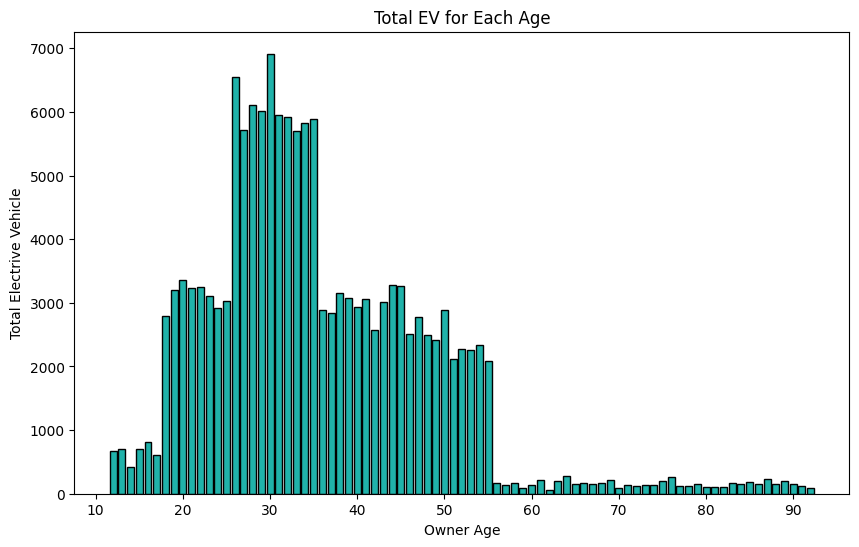

In [125]:
# Bar Graph: Visualize the total EV for each age

plt.figure(figsize=(10, 6))

# Calculate the total EV for each age
total_orders_by_age = df.groupby('Owner Age')['Model'].count()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_orders_by_age.index, total_orders_by_age,color='lightseagreen',edgecolor='black')

# Add title and axis labels for clarity
plt.title('Total EV for Each Age')
plt.xlabel('Owner Age')
plt.ylabel('Total Electrive Vehicle')

# Show the plot
plt.show()

## **Inference :**

**1.From the above bar chart 30 years are placed highest number of EV than other age.**

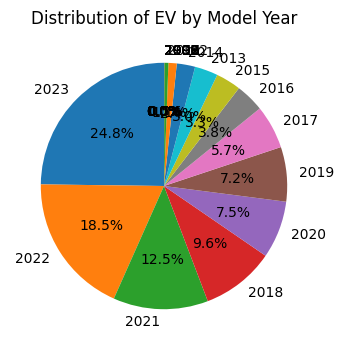

In [126]:
# Pie Chart: Visualize the distribution in years
country_counts = df['Model Year'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of EV by Model Year')
plt.show()

## **Inference :**

**In our dataset, 24% are in 2023.**

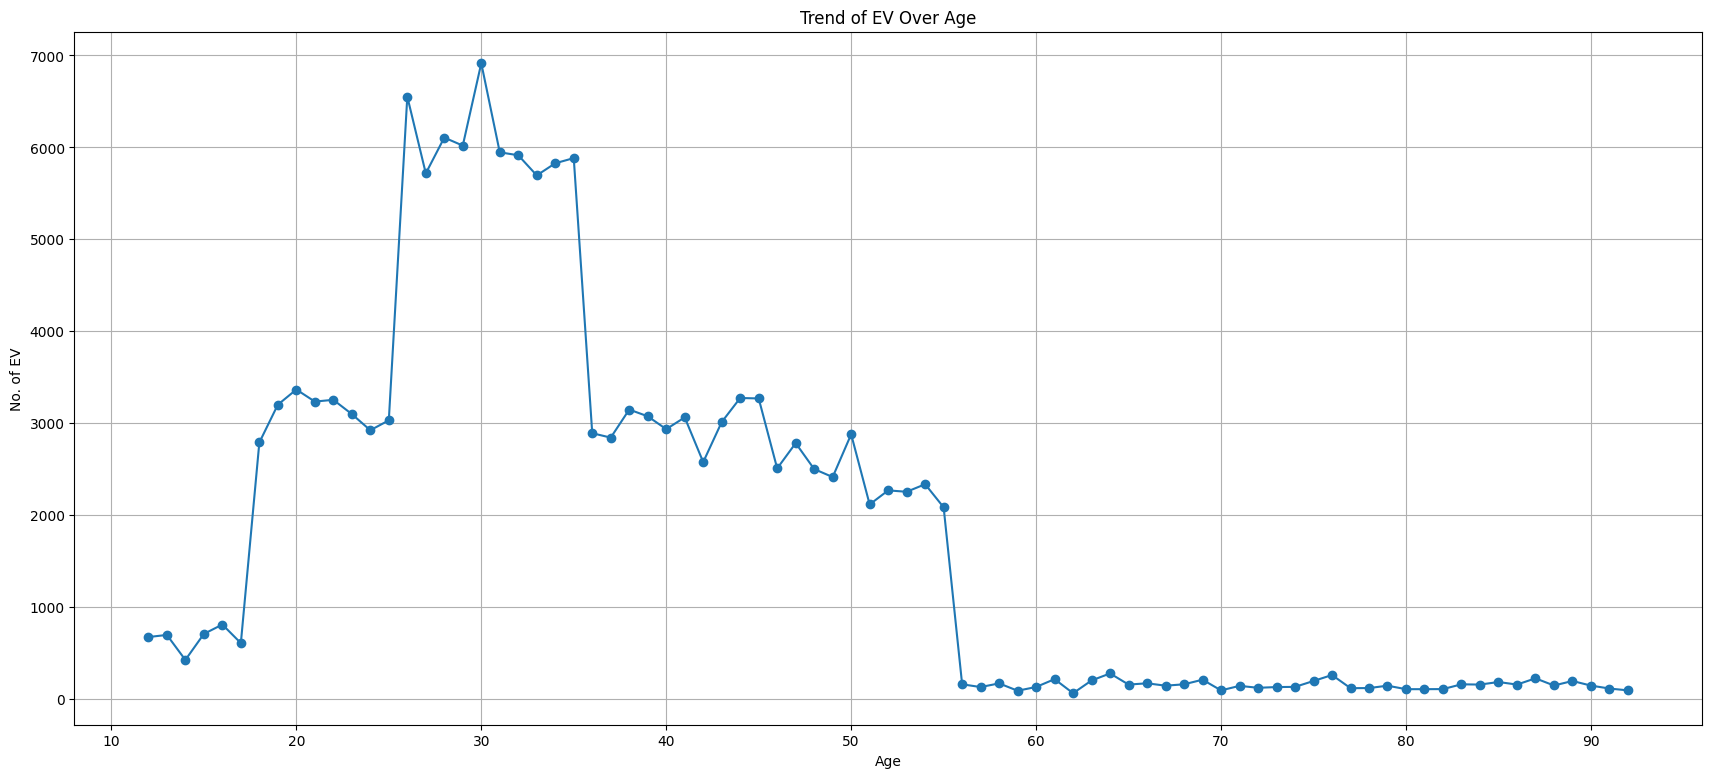

In [127]:
# Line Graph: Visualize the trend of Orders over Age

plt.figure(figsize=(21, 9))
plt.plot(df.groupby('Owner Age')['Model'].count(), marker='o')
plt.title('Trend of EV Over Age')
plt.xlabel('Age')
plt.ylabel('No. of EV')
plt.grid(True)
plt.show()

## **Inference :**

**1.From the above line chart we can see that EV's is increasing from age 20 to 50.**   

**2.EV are rising and falling from age 50-90 if we analize the line chart we can see that.**                                                           

**3.Age group between 25-35 are not much interested to buying Electric vehical.**

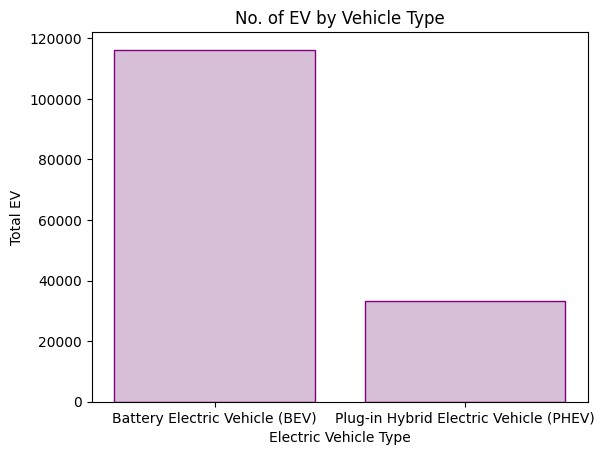

In [128]:
# Bar Graph: Visualize the total EV by Electric Vehicle Type


total_EV = df.groupby('Electric Vehicle Type')['Model'].count()

plt.bar(total_EV.index, total_EV,color='thistle',edgecolor='purple')

plt.title('No. of EV by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Total EV')

# Show the plot
plt.show()

 ## **Inference :**
 
 **The analysis of total EV Vehical type-wise reveals that a significant majority of Battery Electric vehical(BEV).**
 

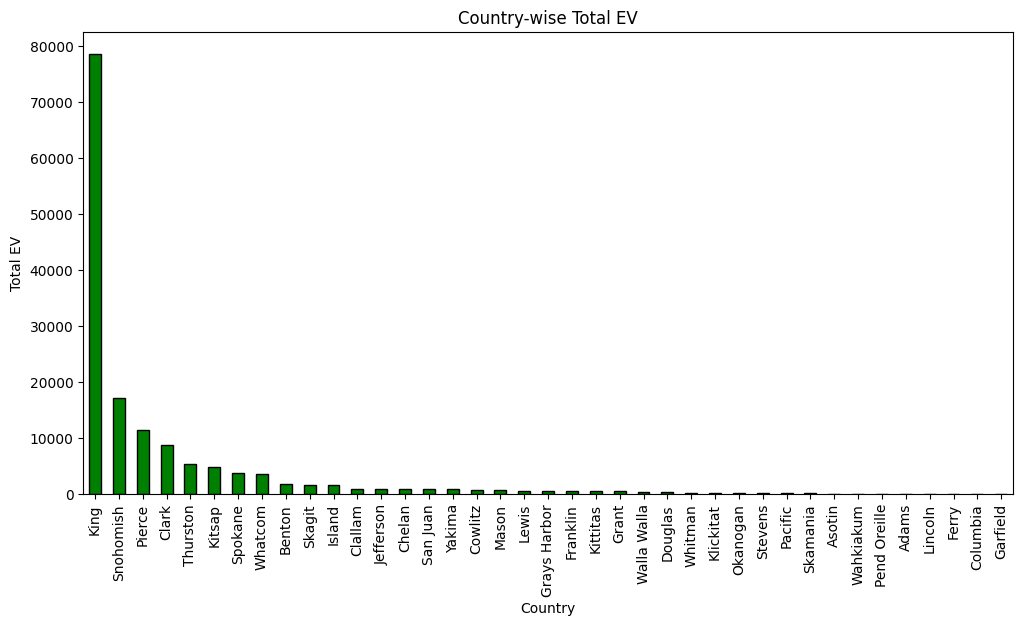

In [129]:
# Group by Country and calculate total EV
statewise_orders = df.groupby('County')['Model'].count().sort_values(ascending=False)

# Plotting the state-wise orders
plt.figure(figsize=(12, 6))
statewise_orders.plot(kind='bar', color='green',edgecolor='black')
plt.title('Country-wise Total EV')
plt.xlabel('Country')
plt.ylabel('Total EV')
plt.show()

## **Inference:**

***1.The above bar chart showing that EV from Country King in a large way so the bar is high here.***

***2.Very lower no. of EV from Garfirld, Columbia, Ferry, Adams Country.***

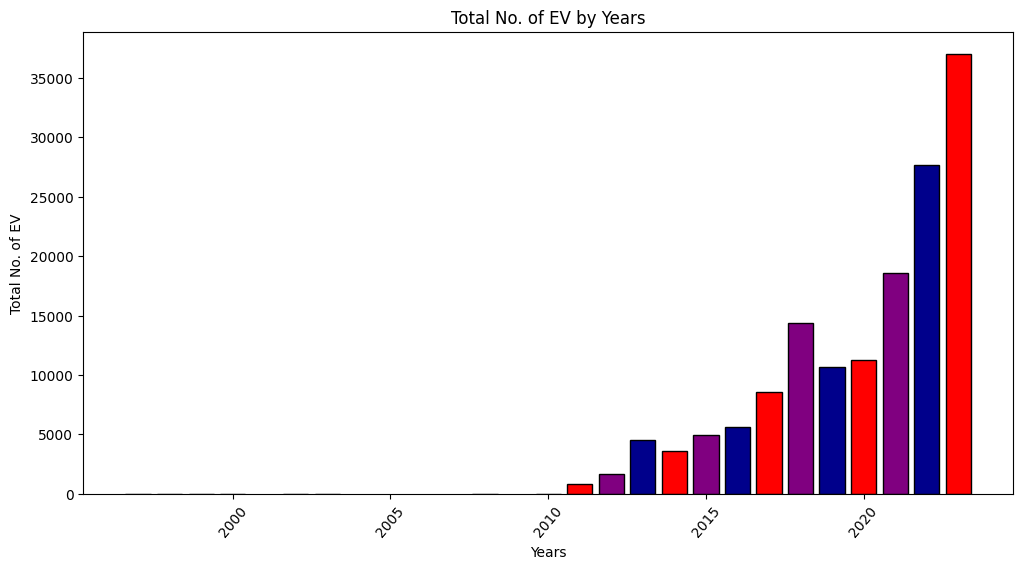

In [130]:
# Bar Graph: Visualize the total EV by Vehicle Type
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the total no. of EV
total_ev_by_type = df.groupby('Model Year')['Model'].count()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_ev_by_type.index, total_ev_by_type, color=['purple','darkblue','red'],edgecolor='black')

# Add title and axis labels for clarity
plt.title('Total No. of EV by Years')
plt.xlabel('Years')
plt.ylabel('Total No. of EV')

# Rotate occupation labels for better visibility
plt.xticks(rotation=50)

# Show the plot
plt.show()

## **Inference:**

**From the above graph we can see the mostly Electric vehicals is Battery Electric Vehical(BEV).**

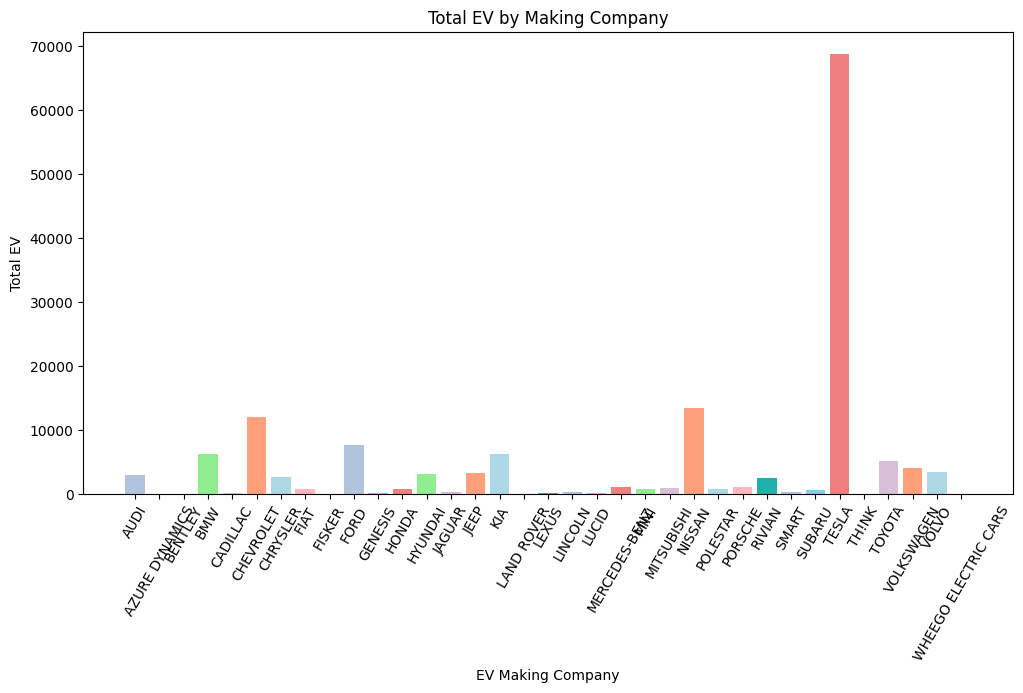

In [131]:
# Bar Graph: Visualize the total EV for each Maker company

# Set up the figure and axis
plt.figure(figsize=(12, 6))

total_ev_by_maker = df.groupby('Make')['Model'].count()

plt.bar(total_ev_by_maker.index, total_ev_by_maker, color= ['lightsteelblue','skyblue', 'lightcoral', 'lightgreen','thistle', 'lightsalmon', 'lightblue', 'lightpink','lightseagreen'])

plt.title('Total EV by Making Company')
plt.xlabel('EV Making Company')
plt.ylabel('Total EV')

# Rotate product category labels for better visibility
plt.xticks(rotation=60)

# Show the plot
plt.show()

## **Inference :**

**The analysis of Electric Vehival Making Company and no. of EV reveals an interesting trend. While the majority of EV are Makeing by the Tesla compnay.** 

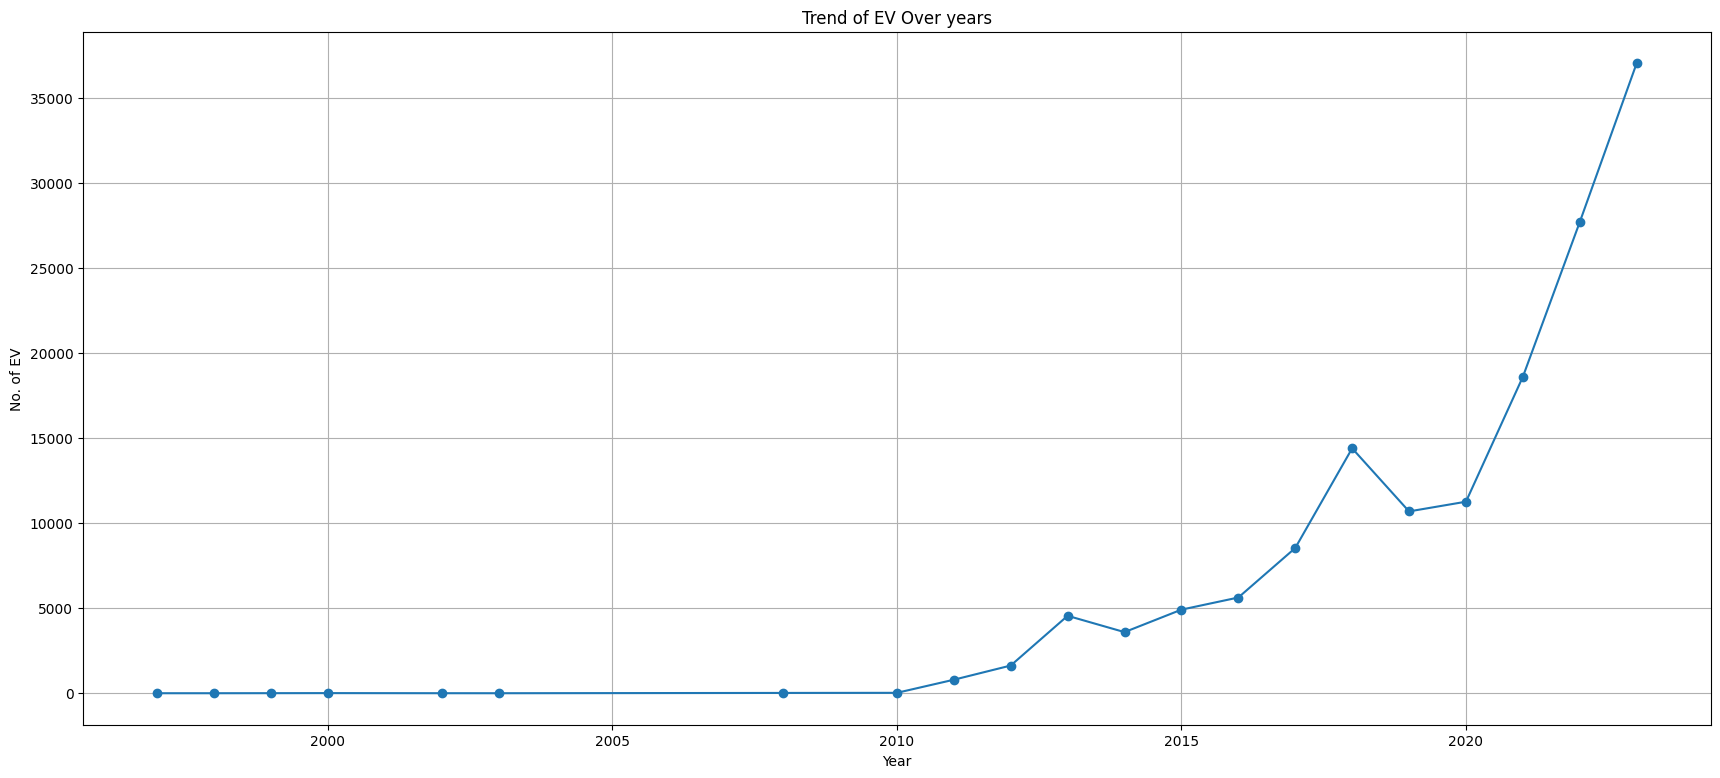

In [132]:
# Line Graph: Visualize the trend of Electric Vehical over years

plt.figure(figsize=(21, 9))
plt.plot(df.groupby('Model Year')['Model'].count(), marker='o')
plt.title('Trend of EV Over years')
plt.xlabel('Year')
plt.ylabel('No. of EV')
plt.grid(True)
plt.show()

## <u>**_Conclusion</u> :_**

**Based on the analysis, it is observed that the age group 26-35, in the country of king with Bettry Electric Vehical are more inclined to make purchases across various making company. Specifically, EV from the Tesla.**

**This information is like a treasure for businesses.The above analysis should help us to understand and explore further on the reasons
behind the popularity and poor sales of the EV. With this foresight a  company can make decisions whether to continue production/trend of a specific Making Company for future . It also says that if we focus our marketing on older age groups, they're likely to spend more. Also, if we encourage people to buy Electric Vehical, it could boost our overall earnings. So, for promotions, the products we offer, and how we interact with customers, knowing these things helps us make smarter decisions to grow our business.**